In [176]:
from __future__ import division
import glob
import os
import sys
import random
from collections import OrderedDict
from itertools import accumulate
import statistics
import pyfastaq
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
import pandas as pd
from pistis import plots, utils
%matplotlib inline
sns.set(style='whitegrid')

In [53]:
bin_names = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11-20', 
             '21-50', '51-100', '101-200', '201-300']
bin_starts = np.append(np.arange(11), np.array([21, 51, 101, 201, 301]))
read_length = 500
reads = 3

In [63]:
# data = iter(
#     random.choices(range(50), k=read_length)
#     list(np.random.randint(low=0, high=50, size=read_length, dtype=np.int8))
#     for _ in range(reads)
# )
data = [
    random.choices(range(50), k=read_length)
    for _ in range(reads)
]
# data = [
#     range(4),
#     range(13),
#     range(204)
# ]

In [6]:
data

[[22,
  18,
  0,
  37,
  3,
  0,
  32,
  12,
  25,
  45,
  37,
  5,
  44,
  1,
  37,
  40,
  5,
  18,
  42,
  13,
  42,
  4,
  0,
  33,
  9,
  44,
  46,
  33,
  22,
  30,
  36,
  38,
  23,
  49,
  36,
  3,
  16,
  6,
  26,
  13,
  11,
  42,
  23,
  14,
  39,
  22,
  14,
  30,
  26,
  23,
  47,
  29,
  11,
  16,
  38,
  15,
  7,
  23,
  1,
  49,
  48,
  46,
  12,
  18,
  8,
  18,
  33,
  2,
  49,
  39,
  18,
  48,
  17,
  40,
  47,
  16,
  21,
  18,
  0,
  47,
  29,
  37,
  5,
  17,
  1,
  49,
  39,
  26,
  35,
  43,
  4,
  10,
  42,
  9,
  48,
  40,
  7,
  5,
  39,
  17,
  17,
  33,
  38,
  48,
  20,
  20,
  31,
  49,
  8,
  32,
  28,
  45,
  47,
  14,
  8,
  4,
  11,
  13,
  38,
  13,
  45,
  16,
  37,
  12,
  18,
  39,
  2,
  3,
  19,
  16,
  10,
  24,
  47,
  39,
  7,
  44,
  49,
  14,
  32,
  21,
  32,
  25,
  2,
  29,
  49,
  41,
  5,
  17,
  12,
  20,
  2,
  35,
  48,
  24,
  27,
  6,
  35,
  19,
  9,
  36,
  44,
  14,
  30,
  23,
  7,
  12,
  13,
  16,
  26,
  5,
  6,
  48,
  4,

AttributeError: 'AxesSubplot' object has no attribute 'get'

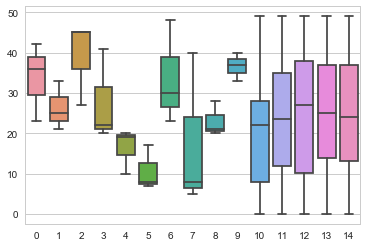

In [60]:
# %%timeit -n 5 -r 3
d = OrderedDict()
for row in data:
    for i, (idx, name) in enumerate(zip(bin_starts[:-1], bin_names)):
        if not name in d.keys():
            d[name] = []
        d[name].extend(row[idx: bin_starts[i+1]])  
fig, ax = plt.subplots()
p=sns.boxplot(data=list(d.values()), ax=ax)
print([item.get_ydata()[0] for item in p.get('whiskers')])
_=p.set_xticklabels(bin_names)

([<matplotlib.axis.YTick at 0x109d58080>,
 <a list of 10 Text yticklabel objects>)

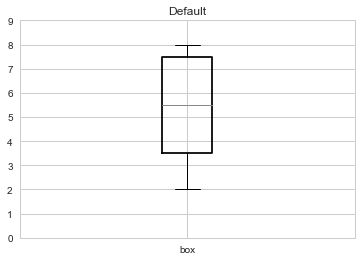

In [61]:
import matplotlib.pyplot as plt

item = {}

item["label"] = 'box' # not required
item["mean"] = 5 # not required
item["med"] = 5.5
item["q1"] = 3.5
item["q3"] = 7.5
#item["cilo"] = 5.3 # not required
#item["cihi"] = 5.7 # not required
item["whislo"] = 2.0 # required
item["whishi"] = 8.0 # required
item["fliers"] = [] # required if showfliers=True

stats = [item]

fig, axes = plt.subplots(1, 1)
axes.bxp(stats)
axes.set_title('Default')
y_axis = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
y_values = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
plt.yticks(y_axis, y_values)

In [67]:
data

[[10,
  41,
  35,
  37,
  42,
  41,
  49,
  31,
  13,
  26,
  13,
  14,
  8,
  10,
  46,
  1,
  13,
  8,
  45,
  1,
  5,
  35,
  16,
  34,
  2,
  31,
  42,
  46,
  40,
  3,
  5,
  27,
  38,
  15,
  44,
  29,
  24,
  4,
  29,
  28,
  49,
  9,
  37,
  23,
  4,
  45,
  33,
  6,
  47,
  12,
  38,
  5,
  24,
  21,
  8,
  30,
  11,
  12,
  24,
  44,
  0,
  44,
  24,
  46,
  42,
  16,
  41,
  3,
  18,
  7,
  31,
  26,
  43,
  3,
  21,
  20,
  42,
  46,
  23,
  0,
  26,
  9,
  42,
  7,
  40,
  21,
  5,
  2,
  39,
  9,
  46,
  17,
  42,
  38,
  28,
  23,
  39,
  33,
  2,
  41,
  13,
  26,
  32,
  34,
  33,
  35,
  47,
  6,
  4,
  40,
  1,
  4,
  47,
  9,
  29,
  33,
  24,
  13,
  33,
  25,
  19,
  3,
  14,
  2,
  45,
  16,
  16,
  5,
  42,
  30,
  11,
  34,
  21,
  10,
  17,
  32,
  47,
  25,
  42,
  27,
  49,
  10,
  18,
  9,
  15,
  11,
  30,
  41,
  35,
  5,
  33,
  29,
  18,
  17,
  32,
  23,
  1,
  3,
  48,
  3,
  9,
  7,
  40,
  38,
  46,
  45,
  49,
  44,
  29,
  6,
  24,
  46,
  16,
  1

In [79]:
4-1.5*11
    

-12.5

In [80]:
gc_content = []
read_lengths = []
mean_quality_scores = []
d_start = OrderedDict((name, OrderedDict()) for name in bin_names)
d_end = OrderedDict((name, OrderedDict()) for name in bin_names)
for record in data:
#     gc_content.append(record.gc_content(as_decimal=False))
#     length = len(record.seq)
#     read_lengths.append(length)
#     __, q_scores = record.to_Fasta_and_qual()
#     mean_quality_scores.append(sum(q_scores) / length)
    for i, (start_idx, bin_name) in enumerate(zip(bin_starts[:-1], bin_names)):
        start_slice = record[start_idx: bin_starts[i + 1]]
        end_slice = record[-bin_starts[i + 1]: -start_idx or None]
        for score in start_slice:
            if score in d_start.get(bin_name):
                d_start[bin_name][score] += 1
            else:
                d_start[bin_name][score] = 1
        for score in end_slice:
            if score in d_end.get(bin_name):
                d_end[bin_name][score] += 1
            else:
                d_end[bin_name][score] = 1

In [82]:
d_start

OrderedDict([('1', OrderedDict([(10, 1), (7, 1), (38, 1)])),
             ('2', OrderedDict([(41, 1), (17, 1), (42, 1)])),
             ('3', OrderedDict([(35, 1), (43, 2)])),
             ('4', OrderedDict([(37, 1), (25, 1), (21, 1)])),
             ('5', OrderedDict([(42, 1), (22, 1), (24, 1)])),
             ('6', OrderedDict([(41, 1), (6, 1), (35, 1)])),
             ('7', OrderedDict([(49, 1), (32, 1), (39, 1)])),
             ('8', OrderedDict([(31, 1), (19, 1), (34, 1)])),
             ('9', OrderedDict([(13, 1), (29, 1), (2, 1)])),
             ('10', OrderedDict([(26, 1), (20, 1), (17, 1)])),
             ('11-20',
              OrderedDict([(13, 3),
                           (14, 2),
                           (8, 3),
                           (10, 3),
                           (46, 1),
                           (1, 2),
                           (45, 1),
                           (5, 1),
                           (36, 1),
                           (47, 1),
           

In [95]:
%%timeit -r 100 -n 10000
d = d_start['11-20']
d = OrderedDict(sorted(d.items()))
size = sum(d.values())
idx = {'q1': size/4,
       'q2': size/2,
       'q3': size*3/4}

def get_val(d, i):
    return next(k for k, x in zip(d, accumulate(d.values())) if i < x)

res = {k: get_val(d, v) for k, v in idx.items()}
res
# {'q1': 16, 'q2': 21, 'q3'res: 21}

16.3 µs ± 1 µs per loop (mean ± std. dev. of 100 runs, 10000 loops each)


In [89]:
import pandas as pd
xs = []
for k, v in d_start['11-20'].items():
    xs.extend([k] * v)
df = pd.DataFrame(xs)
df.describe()

,0
count,33.000000
mean,19.454545
std,14.269922
min,1.000000
25%,10.000000
50%,15.000000
75%,27.000000
max,48.000000


In [32]:
i=9
j=10
[1,2,3,4,5,6,7,8,9,10][i:j]

[10]

In [33]:
[1,2,3,4,5,6,7,8,9,10][-j:-i or None]

[1]

In [ ]:
len(data) * len(data[0])

In [ ]:
len([x for xs in d.values() for x in xs])

In [ ]:
p=sns.boxplot(data=[list(x) for x in d.values()], cut=0)
_=p.set_xticklabels(bin_names, rotation=45)

In [ ]:
len(d['11-20'])

In [ ]:
%%timeit -n 5 -r 3
df_start = utils.bin_quality_scores_by_position(data, shape=(len(data), read_length))

In [7]:
fname = '../tests/data/reads.fastq.gz'
fq = pyfastaq.sequences.file_reader(fname, read_quals=True)
(gc_content,
     read_lengths,
     mean_quality_scores,
     df_start, df_end) = utils.collect_fastq_data(data)

AttributeError: 'list' object has no attribute 'gc_content'

# GC Content

In [ ]:
__ = plots.gc_plot(gc_content)

# Read Length vs Mean Read Quality Score

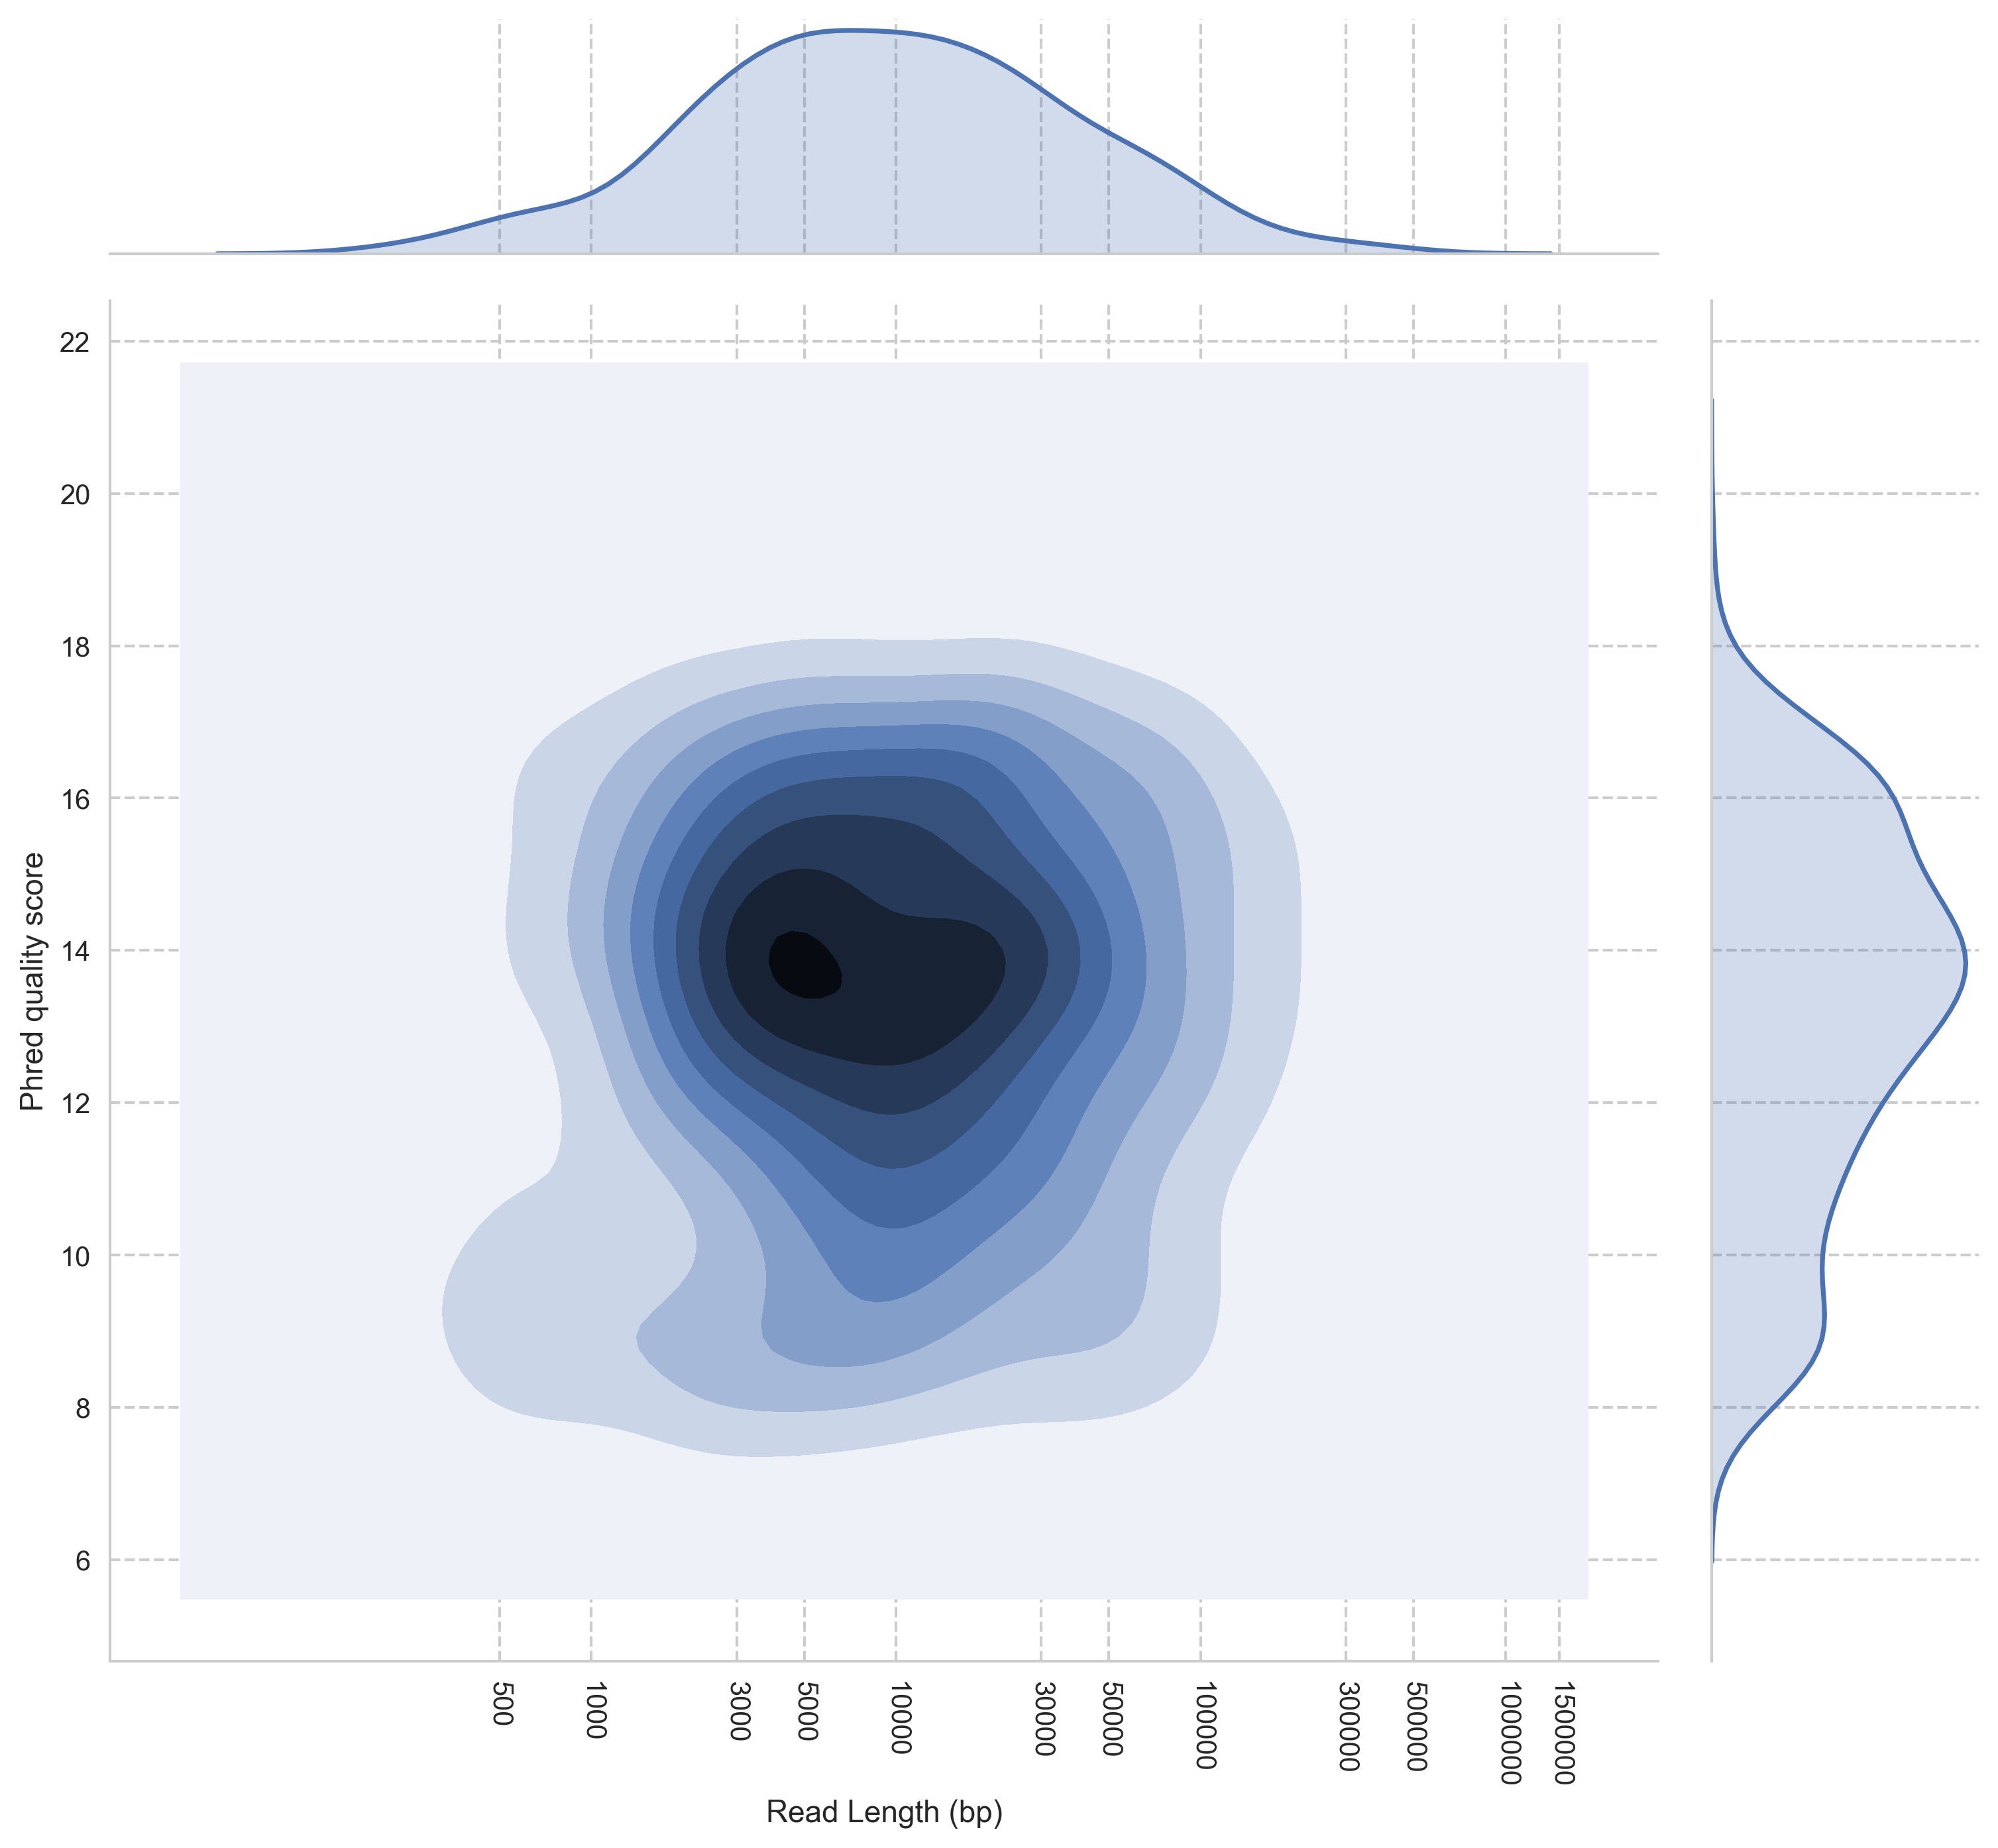

In [4]:
p = plots.length_vs_qual_plot(read_lengths, mean_quality_scores)

# Plot quality score across reads in bins

In [ ]:
__ = plots.quality_per_position(df_start, 'start')

In [ ]:
__ = plots.quality_per_position(df_end, 'end')

# Save plots to a single PDF

In [ ]:
save_as = 'foo.pdf'

plot1 = gc_plot(gc_content)
plot2 = length_vs_qual_plot(read_len, mean_qual)
plot3 = quality_per_position(df_start, 'start')
plot4 = quality_per_position(df_end, 'end')
pp = PdfPages(save_as)
pp.savefig(plot1)
pp.savefig(plot2)
pp.savefig(plot3)
pp.savefig(plot4)
pp.close()

# Mean positional quality score for first *n* bases

In [ ]:
def read_end_quality(all_q_scores, length_from_end, from_end='start'):
    linewidth = 1.5
    size = (11.7, 8.27)  # A4
    from_end = from_end.lower()
    dpi = 300
    xlabel = 'Distance from end of read (bp)'
    ylabel = 'Mean quality (Phred) score'
    title = 'Average quality at the {} of the reads'.format(from_end)
    ylim = (0, 50)

    first_n_qscores = []
    for qscores in all_qscores:
        if from_end == 'start':
            qs = qscores[:length_from_end]
        elif from_end == 'end':
            qs = qscores[-length_from_end:]
        first_n_qscores.append(qs)

    xs = [0] * length_from_end
    for i, scores in enumerate(first_n_qscores):
        for j, s in enumerate(scores):
            xs[j] += s

    num_qscores = len(first_n_qscores)
    for i, s in enumerate(xs):
        xs[i] /= num_qscores
    fig, ax = plt.subplots(figsize=size, dpi=dpi)
    p = ax.plot(xs, linewidth=linewidth)
    if from_end == 'end':
        __ = ax.set_xticks(np.arange(0, length_from_end+1, length_from_end//6))
        __ = ax.set_xticklabels(np.arange(0, length_from_end+1, length_from_end//6)[::-1])
        
    ax.set(xlabel=xlabel, ylabel=ylabel, title=title, ylim=ylim)
    sns.despine()
    return fig

In [ ]:
length = 300
__ = read_end_quality(all_qscores, length)

# Mean positional quality score for last *n* bases

In [ ]:
__ = read_end_quality(all_qscores, length, from_end='end')

In [ ]:
plt.style.use('ggplot')

data = df_start
FIGURE_SIZE = (11.7, 8.27)
DPI = 300
from_end = 'start'
if from_end.lower() == 'start':
    col_names = data.columns
elif from_end.lower() == 'end':
    col_names = data.columns[::-1]
else:
    raise Exception("'start' and 'end' are the only options allowed for "
                    "plotting quality per position.")

title = 'Quality score across reads, from the {}'.format(from_end)
xlabel = 'Read position (bp)'
ylabel = 'Phred Quality Score'
cut = 0  # cuts the violin plot at max and min values (doesn't extrapolate)

fig, axes = plt.subplots(figsize=FIGURE_SIZE, dpi=DPI)
# plot = sns.stripplot(data=data, ax=axes, order=col_names, jitter=True)
plot = sns.violinplot(data=data, ax=axes, order=col_names)
plot.set(xlabel=xlabel, ylabel=ylabel, title=title)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
sns.despine()

In [ ]:
df = df_start.melt(var_name='p', value_name='q')

In [ ]:
plt.scatter(x=df['p'], y=df['q'])

In [158]:
import pysam
bam_name = '../../nanotest/alignment.bam'
samfile = pysam.AlignmentFile(bam_name, "rb")

In [102]:
print(samfile.header)

@HD	VN:1.3	SO:coordinate
@PG	ID:minimap2	PN:minimap2	VN:2.1.1-r341	CL:minimap2 -a -t 4 genome.fa reads.fastq.gz
@SQ	SN:NC_016845.1	LN:5333942
@SQ	SN:NC_016838.1	LN:122799
@SQ	SN:NC_016846.1	LN:111195
@SQ	SN:NC_016839.1	LN:105974
@SQ	SN:NC_016840.1	LN:3751
@SQ	SN:NC_016847.1	LN:3353
@SQ	SN:NC_016841.1	LN:1308



In [104]:
x = samfile.count_coverage('NC_016845.1')

In [106]:
samfile.get_index_statistics()

[IndexStats(contig='NC_016845.1', mapped=1164, unmapped=0, total=1164),
 IndexStats(contig='NC_016838.1', mapped=6, unmapped=0, total=6),
 IndexStats(contig='NC_016846.1', mapped=22, unmapped=0, total=22),
 IndexStats(contig='NC_016839.1', mapped=5, unmapped=0, total=5),
 IndexStats(contig='NC_016840.1', mapped=0, unmapped=0, total=0),
 IndexStats(contig='NC_016847.1', mapped=0, unmapped=0, total=0),
 IndexStats(contig='NC_016841.1', mapped=0, unmapped=0, total=0)]

In [161]:
import re
def get_pID(read):
    """Return the percent identity of a read.
    based on the NM tag if present,
    if not calculate from MD tag and CIGAR string
    read.query_alignment_length can be zero in the case of ultra long reads aligned with minimap2 -L
    """
    try:
        return 100 * (1 - read.get_tag("NM") / read.query_alignment_length)
    except KeyError:
        try:
            return 100 * (1 - (parse_MD(read.get_tag("MD")) + parse_CIGAR(read.cigartuples)) /
                          read.query_alignment_length)
        except KeyError:
            return None
    except ZeroDivisionError:
        return None
    
def parse_MD(MDlist):
    """Parse MD string to get number of mismatches and deletions."""
    return sum([len(item) for item in re.split('[0-9^]', MDlist)])


def parse_CIGAR(cigartuples):
    """Count the insertions in the read using the CIGAR string."""
    return sum([item[1] for item in cigartuples if item[0] == 1])

In [163]:
for i, record in enumerate(samfile):
    if record.is_unmapped: continue
    print(record.get_tag('NM'))
    print(record.query_alignment_length)
    if i > 3: break

758
5760
6029
21436
8379
25911
304
2945
690
4719


In [174]:
# %%timeit -n 50 -r 5
ids = []
ids2 = []
samfile = pysam.AlignmentFile(bam_name, "rb")
print(type(samfile))
for record in samfile:
    pid = get_pID(record)
    if pid:
        ids.append(pid)
    try:
        pid2 = (record.query_alignment_length-record.get_tag('NM')/record.query_alignment_length)
        ids2.append(pid2)
    except KeyError:
        try:
            pid2 = ((parse_MD(record.get_tag("MD")) + parse_CIGAR(record.cigartuples))-record.query_alignment_length) / record.query_alignment_length
            ids2.append(pid2)
        except KeyError:
            continue
    except ZeroDivisionError:
        continue
    

<class 'pysam.libcalignmentfile.AlignmentFile'>


In [173]:
for x, y in zip(ids, ids2):
    print('{}\t{}'.format(x, y))

86.86943620178042	1347.8686943620178
80.08738027222316	5950.800873802722
90.13219757729964	18078.901321975773
88.68930446194226	24383.88689304462
77.28049197130167	20488.772804919714
90.4431967506869	41854.90443196751
84.24129062426935	8553.842412906242
87.36059479553904	1075.8736059479554
87.46960701159175	17684.874696070117
85.45913765109147	5542.854591376511
86.84027777777777	5759.868402777778
71.87441686881881	21435.718744168687
67.66238277179578	25910.67662382772
89.6774193548387	2944.8967741935485
85.37825810553083	4718.853782581055
80.92980578070042	58850.80929805781
79.49907235621522	1077.7949907235623
87.46010031919744	4385.874601003192
80.49954860066205	6645.804995486006
82.98894180321253	24777.829889418033
90.19947961838682	3458.9019947961838
90.62009125589049	13368.90620091256
88.42845973416732	3836.884284597342
85.59139784946237	3719.8559139784948
91.01717305151915	1513.9101717305152
86.54139156932453	1968.8654139156934
87.34917540439433	18978.873491754042
82.9886824088305

[[<matplotlib.axis.XTick at 0x11a944978>,
 [Text(0,0,'0.0'),
  Text(0,0,'20.0'),
  Text(0,0,'40.0'),
  Text(0,0,'60.0'),
  Text(0,0,'80.0'),
  Text(0,0,'87.38'),
  Text(0,0,'100.0')]]

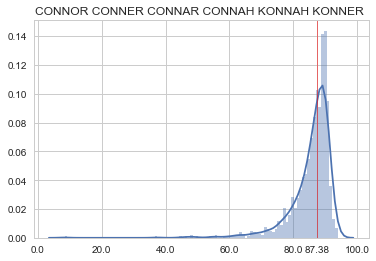

In [212]:
p=sns.distplot(ids, bins=100)
p.set(title="CONNOR CONNER CONNAR CONNAH KONNAH KONNER ")
plt.plot([np.median(ids)]*2, [0,1], linewidth=1, c='r', alpha=0.5)
xticks = p.get_xticks().tolist()[1:-1]
xticks.append(round(np.median(ids), 2))
p.set(xticklabels=sorted(xticks), xticks=sorted(xticks))

In [135]:
500000 / (1256 / .126)

50.15923566878981

In [177]:
%%timeit -r 3 -n 1000
statistics.median(ids)

183 µs ± 14.3 µs per loop (mean ± std. dev. of 3 runs, 1000 loops each)


In [178]:
%%timeit -r 3 -n 1000
np.median(ids)

81.1 µs ± 6.28 µs per loop (mean ± std. dev. of 3 runs, 1000 loops each)


In [218]:
np.median(ids).round(2)

87.38

In [220]:

ids.sort()

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

In [227]:
list(range(0, 101, 10))

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]